# Image Processing in Python: 02

```
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

## Color channel intensities

In [4]:
astronaut_image = data.astronaut()

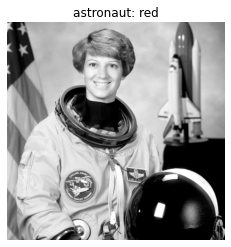

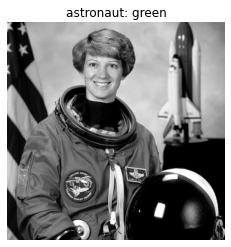

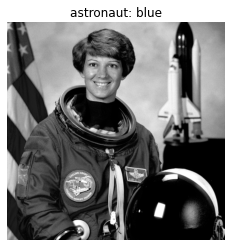

In [11]:
show_image(astronaut_image[:, :, 0], "astronaut: red")
show_image(astronaut_image[:, :, 1], "astronaut: green")
show_image(astronaut_image[:, :, 2], "astronaut: blue")

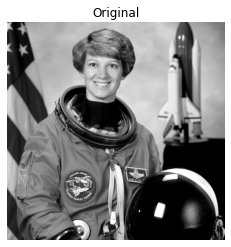

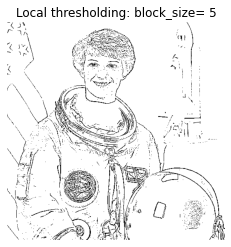

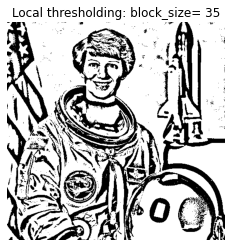

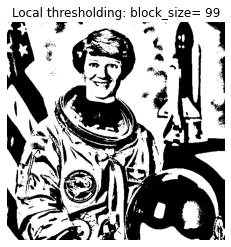

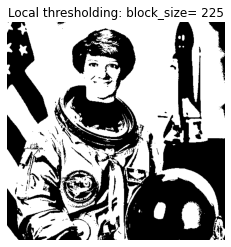

In [15]:
show_image(color.rgb2gray(astronaut_image), 'Original')
block_size = [5, 35, 99, 225]

for bsize in block_size:
    # Obtain the optimal local thresholding
    local_thresh_astro = threshold_local(color.rgb2gray(astronaut_image), bsize, offset=0.02)

    # Apply local thresholding and obtain the binary image
    binary_local_astro = color.rgb2gray(astronaut_image) > local_thresh_astro

    # Show the original and binarized image
    show_image(binary_local_astro, 'Local thresholding: block_size= '+ str(bsize))

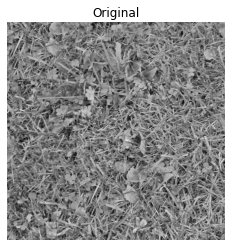

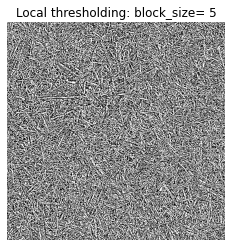

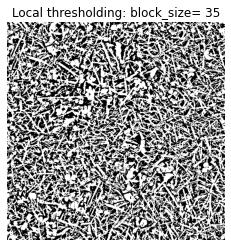

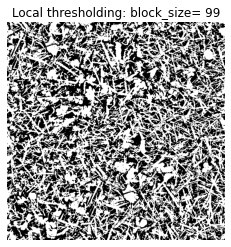

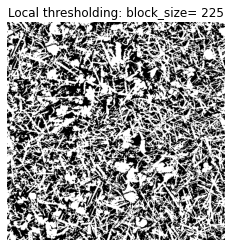

In [16]:
grass = data.grass()
show_image(grass, 'Original')
block_size = [5, 35, 99, 225]

for bsize in block_size:
    # Obtain the optimal local thresholding
    local_thresh_grass = threshold_local(grass, bsize, offset=0.02)

    # Apply local thresholding and obtain the binary image
    binary_local_grass = grass > local_thresh_grass

    # Show the original and binarized image
    show_image(binary_local_grass, 'Local thresholding: block_size= '+ str(bsize))

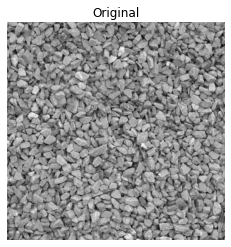

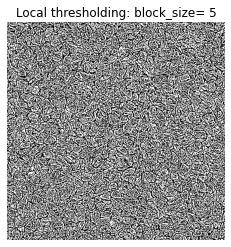

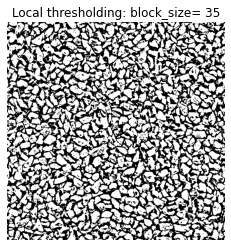

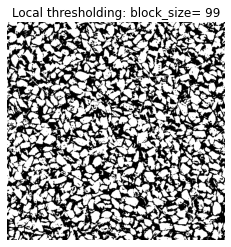

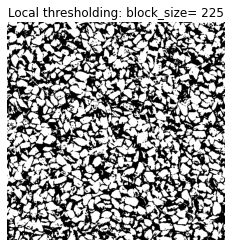

In [19]:
gravel = data.gravel()
show_image(gravel, 'Original')
block_size = [5, 35, 99, 225]

for bsize in block_size:
    # Obtain the optimal local thresholding
    local_thresh_gravel = threshold_local(gravel, bsize, offset=0.02)

    # Apply local thresholding and obtain the binary image
    binary_local_gravel = gravel > local_thresh_gravel

    # Show the original and binarized image
    show_image(binary_local_gravel, 'Local thresholding: block_size= '+ str(bsize))

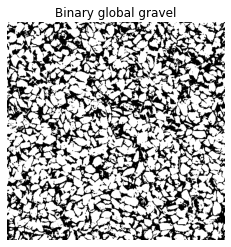

In [20]:
global_thresh_gravel = threshold_otsu(gravel)
binary_global_gravel = gravel > global_thresh_gravel
show_image(binary_global_gravel, "Binary global gravel")

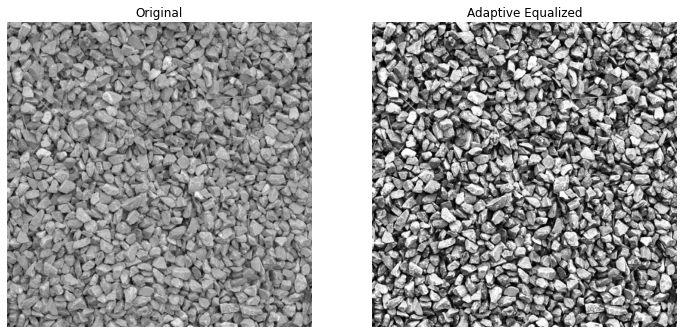

In [21]:
image_adapteq_gravel= exposure.equalize_adapthist(gravel, clip_limit=0.03)
plot_comparison(gravel, image_adapteq_gravel, "Adaptive Equalized")

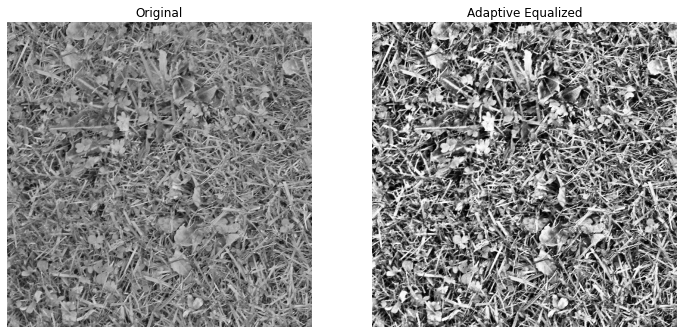

In [22]:
image_adapteq_grass= exposure.equalize_adapthist(grass, clip_limit=0.03)
plot_comparison(grass, image_adapteq_grass, "Adaptive Equalized")

## Histogram equalization (continued)

#### What's the contrast of this image?

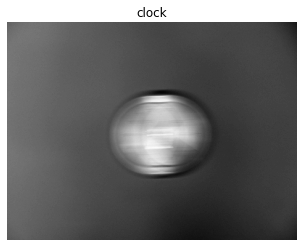

In [24]:
clock_image = data.clock()
show_image(clock_image, "clock")

The histogram tells us.

Just as we saw previously, you can calculate the contrast by calculating the range of the pixel intensities i.e. by subtracting the minimum pixel intensity value from the histogram to the maximum one.

You can obtain the maximum pixel intensity of the image by using the `np.max()` method from `NumPy` and the minimum with `np.min()`.

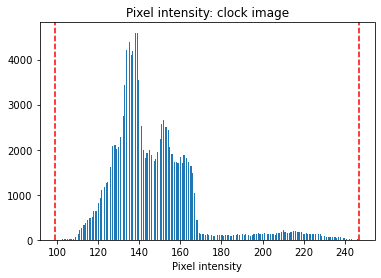

In [32]:
plt.hist(clock_image.ravel(), bins=256)
plt.axvline(x=np.max(clock_image), color='red', linestyle='--')
plt.axvline(x=np.min(clock_image), color='red', linestyle='--')
plt.xlabel('Pixel intensity')
plt.title('Pixel intensity: clock image')
plt.show()

In [33]:
clock_contrast = np.max(clock_image) - np.min(clock_image)
print("The contrast of the clock image is: ", clock_contrast)

The contrast of the clock image is:  148


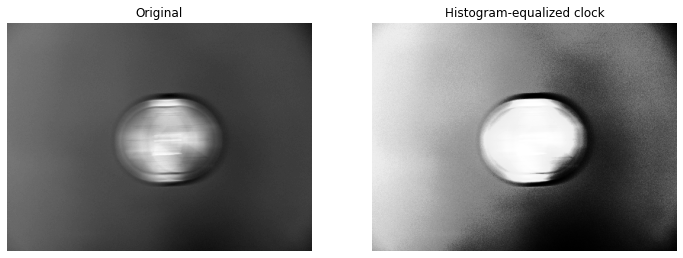

In [34]:
clock_image_heq =  exposure.equalize_hist(clock_image)
plot_comparison(clock_image, clock_image_heq, "Histogram-equalized clock")

***

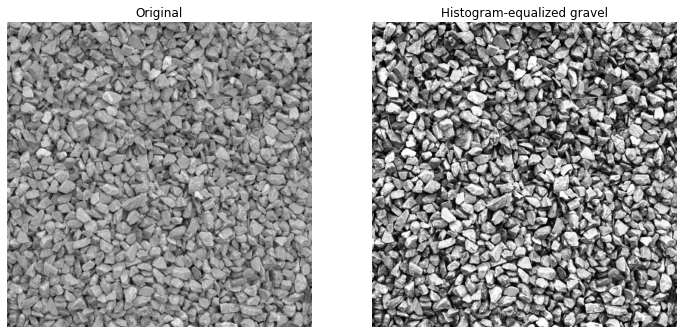

In [35]:
gravel_image_heq =  exposure.equalize_hist(gravel)
plot_comparison(gravel, gravel_image_heq, "Histogram-equalized gravel")

In [45]:
gravel_contrast = np.max(gravel) - np.min(gravel)
print("The contrast of the gravel image is: ", gravel_contrast)

The contrast of the gravel image is:  237


In [48]:
gravel_contrast_eq = np.max(gravel_image_heq) - np.min(gravel_image_heq)
print("The contrast of the gravel_heq image is: ", moon_contrast_eq)

The contrast of the gravel_heq image is:  0.99908447265625


***

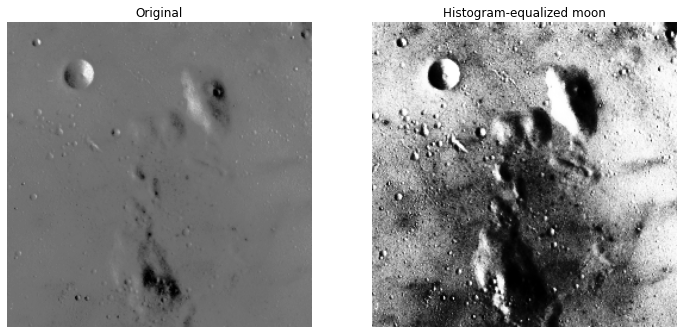

In [51]:
moon = data.moon()
moon_image_heq =  exposure.equalize_hist(moon)
plot_comparison(moon, moon_image_heq, "Histogram-equalized moon")

In [46]:
moon_contrast = np.max(moon) - np.min(moon)
print("The contrast of the moon image is: ", moon_contrast)

The contrast of the moon image is:  255


In [47]:
moon_contrast_eq = np.max(moon_image_heq) - np.min(moon_image_heq)
print("The contrast of the moon image is: ", moon_contrast_eq)

The contrast of the moon image is:  0.99908447265625


***

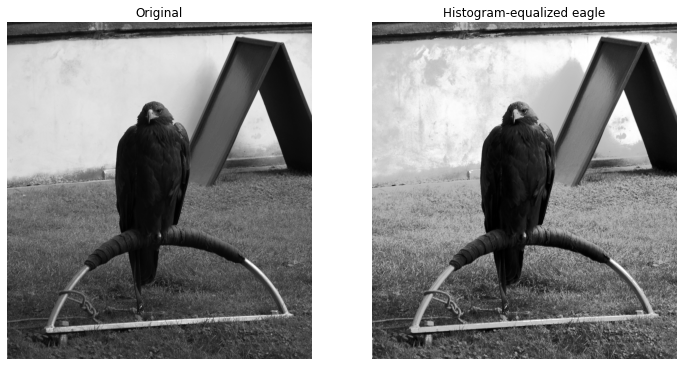

In [39]:
eagle = data.eagle()
eagle_image_heq =  exposure.equalize_hist(eagle)
plot_comparison(eagle, eagle_image_heq, "Histogram-equalized eagle")

***

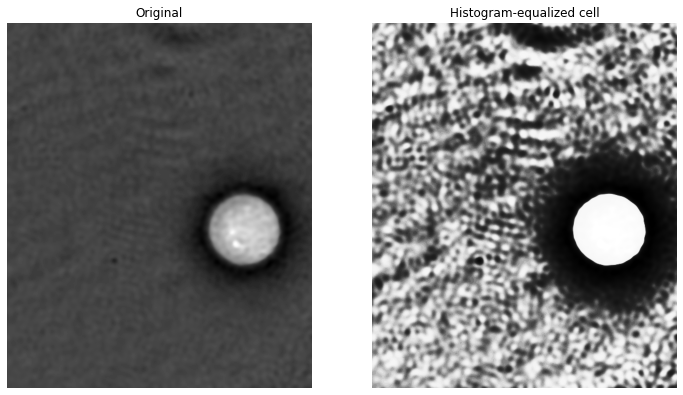

In [40]:
cell = data.cell()
cell_image_heq =  exposure.equalize_hist(cell)
plot_comparison(cell, cell_image_heq, "Histogram-equalized cell")

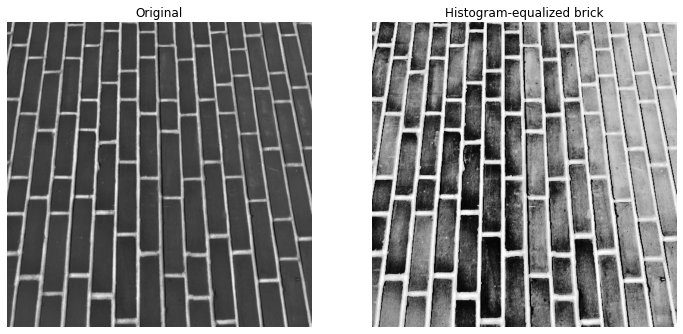

In [43]:
brick = data.brick()
brick_image_heq =  exposure.equalize_hist(brick)
plot_comparison(brick, brick_image_heq, "Histogram-equalized brick")

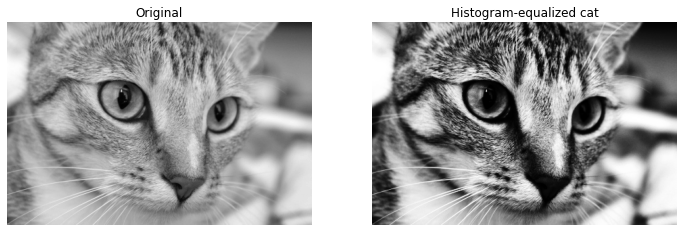

In [52]:
cat_g = color.rgb2gray(data.cat())
cat_image_heq =  exposure.equalize_hist(cat_g)
plot_comparison(cat_g, cat_image_heq, "Histogram-equalized cat")

### Medical Images

You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. 

[National Institutes of Health Chest X-Rays Database](https://www.kaggle.com/nih-chest-xrays/data)

First, you'll check the histogram of the image and then apply standard histogram equalization to improve the contrast. Remember we obtain the histogram by using the `hist()` function from `matplotlib`, which has been already imported as `plt`.

```
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')
```

```
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq = exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')
```